In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['advertising.csv']


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings                       
warnings.filterwarnings("ignore")
dataset = pd.read_csv('../input/advertising.csv')
dataset.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [4]:
#Check for duplicates
dataset.duplicated().sum()

0

In [5]:
#Check for missing features
dataset.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [6]:
#Correlation analysis
corrm = dataset.corr()
corrm['Clicked on Ad'].sort_values(ascending = False)

Clicked on Ad               1.000000
Age                         0.492531
Male                       -0.038027
Area Income                -0.476255
Daily Time Spent on Site   -0.748117
Daily Internet Usage       -0.786539
Name: Clicked on Ad, dtype: float64

In [7]:
#Exploring target
dataset['Clicked on Ad'].value_counts()

1    500
0    500
Name: Clicked on Ad, dtype: int64

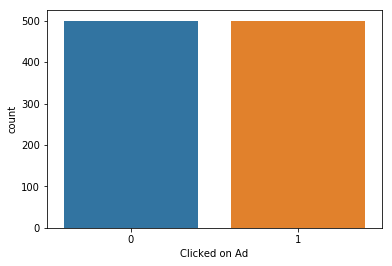

In [8]:
sns.countplot(x = 'Clicked on Ad', data = dataset)

In [9]:
#Statistical information on the numeric features
dataset.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [10]:
#Statistical information on the categorical features
categ_cols = ['Ad Topic Line', 'City', 'Country']
dataset[categ_cols].describe(include = ['O'])

,Ad Topic Line,City,Country
count,1000,1000,1000
unique,1000,969,237
top,User-friendly client-server instruction set,Lisamouth,France
freq,1,3,9


Extracting Datetime features

In [11]:
dataset['Timestamp'] = pd.to_datetime(dataset['Timestamp'])
dataset['Timestamp']
dataset['Year'] = dataset['Timestamp'].dt.year
dataset['Month'] = dataset['Timestamp'].dt.month
dataset['Day'] = dataset['Timestamp'].dt.day
dataset['Hour'] = dataset['Timestamp'].dt.hour
dataset['Weekday'] = dataset['Timestamp'].dt.dayofweek
dataset = dataset.drop(['Timestamp'], axis=1)
dataset.head(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Clicked on Ad,Year,Month,Day,Hour,Weekday
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0,2016,3,27,0,6
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,0,2016,4,4,1,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0,2016,3,13,20,6
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0,2016,1,10,2,6
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,0,2016,6,3,3,4
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,0,2016,5,19,14,3
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,0,2016,1,28,20,3
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,1,2016,3,7,1,0
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,0,2016,4,18,9,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,0,2016,7,11,1,0



Relationship between features


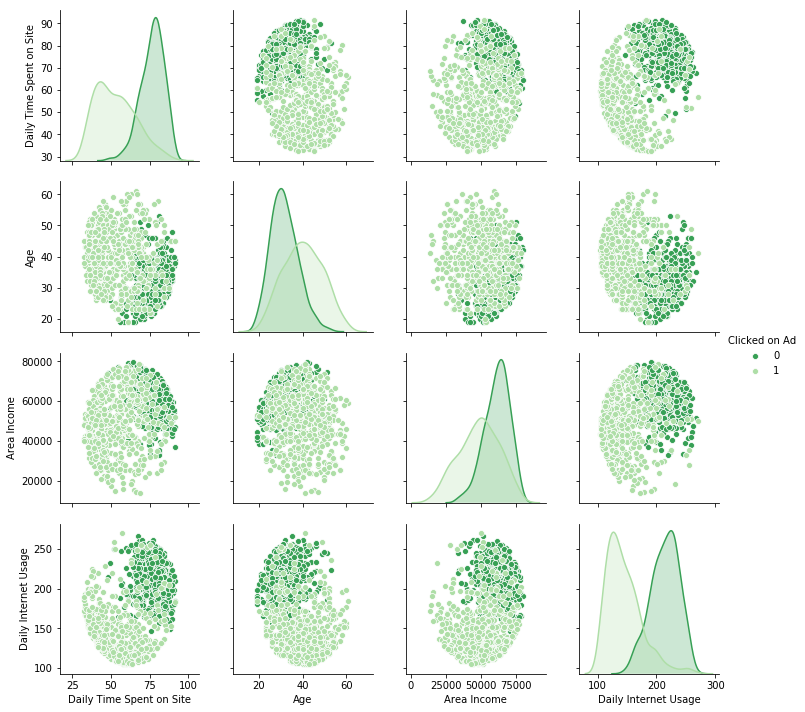

In [12]:
#Relationship between numerical featuers
sns.pairplot(dataset, hue = 'Clicked on Ad', 
             vars = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage'], palette = 'Greens_r')

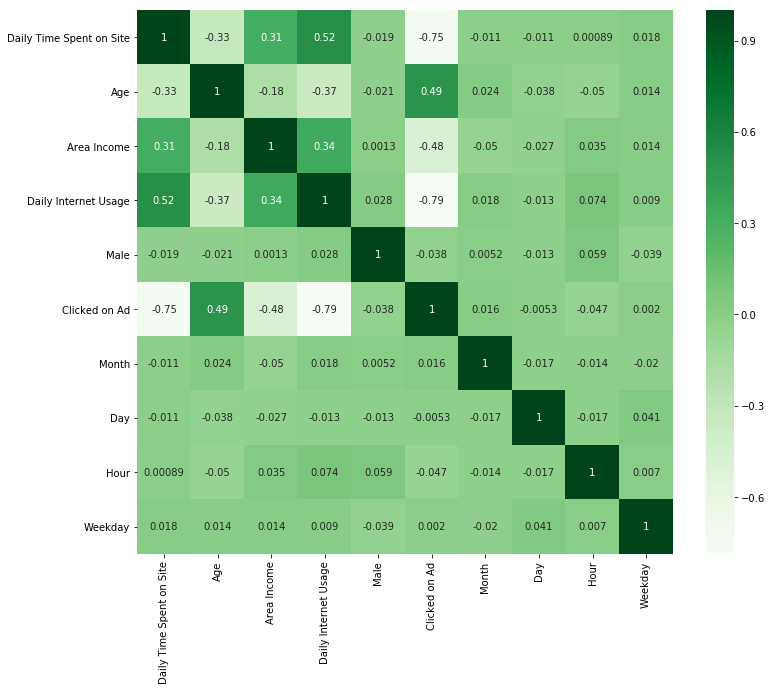

In [13]:
dataset = dataset.drop(['Year'], axis=1)
#Correlation heatmap with new features
fig = plt.figure(figsize = (12,10))
sns.heatmap(dataset.corr(), cmap='Greens', annot = True)

Building Logistic Regression model

In [14]:
X = dataset.iloc[:,[0,1,2,3,6,9,10,11,12]].values
y = dataset.iloc[:,8].values
#Splitting the data into train and test sets 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
#Scaling the data
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
X_train = standardScaler.fit_transform(X_train)
X_test = standardScaler.transform(X_test)

In [15]:
#Initiate and fit the model of Logistic Regression on training data
from sklearn.linear_model import LogisticRegression
log_rg = LogisticRegression()
log_rg.fit(X_train, y_train)
#Prediction
y_log_rg = log_rg.predict(X_test)

Evaluating results

Text(0.5, 1.05, 'Confusion matrix for Logistic Regression')

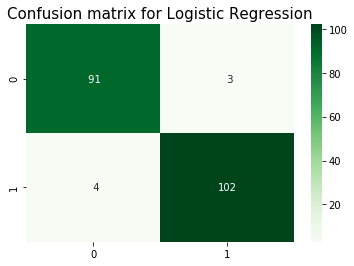

In [16]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_log_rg)
sns.heatmap(cm,annot=True,fmt='3.0f',cmap="Greens")
plt.title('Confusion matrix for Logistic Regression', y=1.05, size=15)

In [17]:
#Classification report
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_log_rg)
print(cr)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96        94
           1       0.97      0.96      0.97       106

   micro avg       0.96      0.96      0.96       200
   macro avg       0.96      0.97      0.96       200
weighted avg       0.97      0.96      0.97       200



Building Naive Bayes model

In [18]:
#Initiate and fit the model of Naive Bayes on training data
from sklearn.naive_bayes import GaussianNB
naive_b = GaussianNB()
naive_b.fit(X_train, y_train)
#Prediction
y_naive = naive_b.predict(X_test)

Evaluating results


Text(0.5, 1.05, 'Confusion matrix for Naive Bayes')

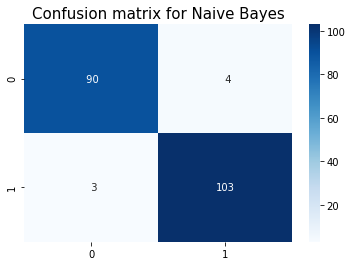

In [19]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
naive_cm = confusion_matrix(y_test, y_naive)
sns.heatmap(naive_cm,annot=True,fmt='3.0f',cmap="Blues")
plt.title('Confusion matrix for Naive Bayes', y=1.05, size=15)

In [20]:
#Classification report
from sklearn.metrics import classification_report
naive_cr = classification_report(y_test, y_naive)
print(naive_cr)

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        94
           1       0.96      0.97      0.97       106

   micro avg       0.96      0.96      0.96       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.97      0.96      0.96       200



Building Random Forest model

In [21]:
#Initiate and fit the model of Random Forest on training data
from sklearn.ensemble import RandomForestClassifier
randm_frst = RandomForestClassifier()
randm_frst.fit(X_train, y_train)
#Prediction
y_frst = randm_frst.predict(X_test)

Evaluating results

Text(0.5, 1.05, 'Confusion matrix for Random Forest')

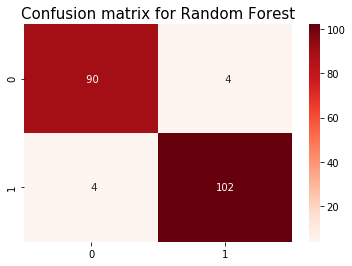

In [22]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
frst_cm = confusion_matrix(y_test, y_frst)
sns.heatmap(frst_cm,annot=True,fmt='3.0f',cmap="Reds")
plt.title('Confusion matrix for Random Forest', y=1.05, size=15)

In [23]:
#Classification report
from sklearn.metrics import classification_report
frst_cr = classification_report(y_test, y_frst)
print(frst_cr)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        94
           1       0.96      0.96      0.96       106

   micro avg       0.96      0.96      0.96       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.96      0.96      0.96       200



Building K-Nearest Neighbors model

In [24]:
#Initiate and fit the model of K-Nearest Neighbors on training data
from sklearn.neighbors import KNeighborsClassifier
kneighbors = KNeighborsClassifier()
kneighbors.fit(X_train, y_train)
#Prediction
y_knn = kneighbors.predict(X_test)

Evaluating results

Text(0.5, 1.05, 'Confusion matrix for K-Nearest Neighbors')

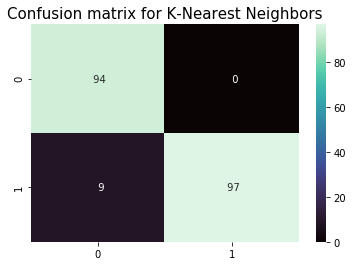

In [25]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
knn_cm = confusion_matrix(y_test, y_knn)
sns.heatmap(knn_cm,annot=True,fmt='3.0f',cmap="mako")
plt.title('Confusion matrix for K-Nearest Neighbors', y=1.05, size=15)

In [26]:
#Classification report
from sklearn.metrics import classification_report
knn_cr = classification_report(y_test, y_knn)
print(knn_cr)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        94
           1       1.00      0.92      0.96       106

   micro avg       0.95      0.95      0.95       200
   macro avg       0.96      0.96      0.95       200
weighted avg       0.96      0.95      0.96       200



Model comparison by f1 score

In [27]:
from sklearn.metrics import f1_score
f1_log = f1_score(y_test, y_log_rg)
f1_naive = f1_score(y_test, y_naive)
f1_frst = f1_score(y_test, y_frst)
f1_knn = f1_score(y_test, y_knn)
from pandas import DataFrame
scores = {'Model':  ['Logistic Regression','Naive_Bayes', 'Random Forest', 'KNN'], 
          'f1 score': [f1_log, f1_naive, f1_frst, f1_knn]}
f1_scores = DataFrame (scores, columns = ['Model','f1 score'])
f1_scores

,Model,f1 score
0,Logistic Regression,0.966825
1,Naive_Bayes,0.967136
2,Random Forest,0.962264
3,KNN,0.955665


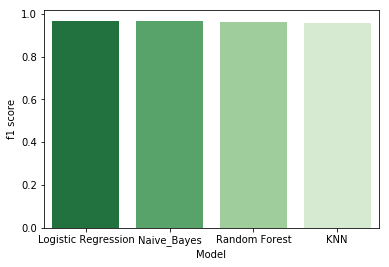

In [28]:
sns.barplot(x="Model", y="f1 score", data=f1_scores, palette="Greens_r")

Fine-tuning models

In [29]:
#Choose hyperparameters for Random Forest model
from sklearn.model_selection import GridSearchCV
param_frst = [{"n_estimators": [10,100,200,300,500], "criterion": ["gini", "entropy"]}]
grid_search_frst = GridSearchCV(estimator=randm_frst,
                          param_grid=param_frst,
                          scoring = 'accuracy',
                          cv=10)
grid_search_frst = grid_search_frst.fit(X_train, y_train)

In [30]:
#Calculation best accuracy for Random Forest model
best_acc_frst = grid_search_frst.best_score_
best_acc_frst

0.9625

In [31]:
#Calculation best parameters for Random Forest model
best_params_frst = grid_search_frst.best_params_
best_params_frst

{'criterion': 'gini', 'n_estimators': 500}

In [32]:
#Choose hyperparameters for K-Nearest Neighbors model
from sklearn.model_selection import GridSearchCV
param_knn = [{"n_neighbors": range(1,10), "weights": ["uniform", "distance"]}]
grid_search_knn = GridSearchCV(estimator=kneighbors,
                          param_grid=param_knn,
                          scoring = 'accuracy',
                          cv=10)
grid_search_knn = grid_search_knn.fit(X_train, y_train)

In [33]:
#Calculation best accuracy for K-Nearest Neighbors model
best_acc_knn = grid_search_knn.best_score_
best_acc_knn

0.9525

In [34]:
#Calculation best parameters for K-Nearest Neighbors model
best_params_knn = grid_search_knn.best_params_
best_params_knn

{'n_neighbors': 9, 'weights': 'uniform'}

Rebuilding models with hyperparametrs

In [35]:
#Initiate and fit the model of Random Forest on training data with hyperparamets
from sklearn.ensemble import RandomForestClassifier
randm_frst_imp = RandomForestClassifier(n_estimators=100, criterion='gini')
randm_frst_imp.fit(X_train, y_train)
#Prediction
y_frst_imp = randm_frst_imp.predict(X_test)

In [36]:
#Initiate and fit the model of K-Nearest Neighbors on training data with hyperparamets
from sklearn.neighbors import KNeighborsClassifier
kneighbors_imp = KNeighborsClassifier(n_neighbors=5, weights= 'uniform')
kneighbors_imp.fit(X_train, y_train)
#Prediction
y_knn_imp = kneighbors_imp.predict(X_test)

In [37]:
#Recalculation f1 score
f1_frst_imp = f1_score(y_test, y_frst_imp)
f1_knn_imp = f1_score(y_test, y_knn_imp)
scores_imp = {'Model':  ['Logistic Regression','Naive_Bayes', 'Random Forest', 'KNN'], 
          'f1 score': [f1_log, f1_naive, f1_frst_imp, f1_knn_imp]}
f1_scores_imp = DataFrame (scores_imp, columns = ['Model','f1 score'])
f1_scores_imp.sort_values(by=['f1 score'], ascending=False)

,Model,f1 score
1,Naive_Bayes,0.967136
0,Logistic Regression,0.966825
2,Random Forest,0.957746
3,KNN,0.955665


Text(0.5, 1.05, 'Confusion matrix for Random Forest with hyperparameters')

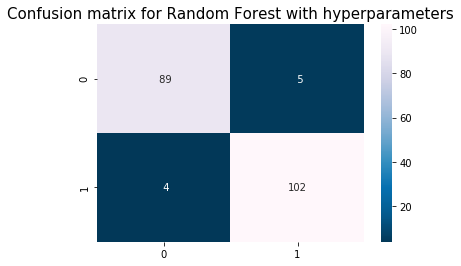

In [38]:
#Confusion matrix for best model
frst_imp_cm = confusion_matrix(y_test, y_frst_imp)
sns.heatmap(frst_imp_cm,annot=True,fmt='3.0f',cmap="PuBu_r")
plt.title('Confusion matrix for Random Forest with hyperparameters', y=1.05, size=15)


The ROC Curve

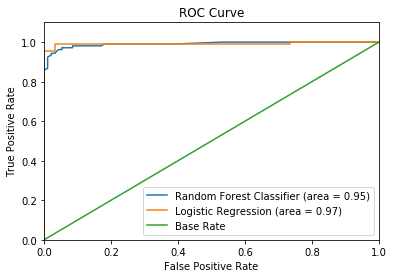

In [39]:
from sklearn.metrics import roc_auc_score
lr_auc = roc_auc_score(y_test, log_rg.predict(X_test))
rf_roc_auc = roc_auc_score(y_test, randm_frst_imp.predict(X_test))

# Create ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, log_rg.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, randm_frst_imp.predict_proba(X_test)[:,1])

plt.figure()
# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest Classifier (area = %0.2f)' % rf_roc_auc)
# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % lr_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.10])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
